# Modelos supervisados
requieren de datos historicos

## Regresión lineal los minimos cuadrados
**minimizar la diferencia, encontrar el valor con menor diferencia**

Formúla de la diferencia entre el valor estimado y el valor real
>**e=(y-Y(x))**
> 
El objetivo es minimizar la suma de los errores al cuadrado
>
sobre todos los puntos del data set: 
>

<img src=https://anestesiar.org/WP/uploads/2020/04/regresi%C3%B3n-lineal_formula-5.jpg>

### Tipos de variables
* variable predictora, es la que tenemos
* variable de salida, la que queremos saber

### Problema
Modelar el precio de los pisos según su superficie en metros cuadrados

Variables
* superficie, variable predictora
* costo, variable de salida

#### Ecuación
costo=n+b+supericie

## Proceso
con lo datos historicos podríamos crear un modelo lineal y obtener los posibles valores de alfa y beta.



* alfa: 86.96
* beta: 2.37

#### Modelo lineal

 Formúla: 
 >**Y=86.96+2.37*x**
 > 
 el precio de la renta es igual a sumar alfa más beta por el número de metros cuadrados



##### Aplicación
Para un departamento de 110m^2 el costo sería de 347.66 pesos 
> **Y=86.96+2.37*110=347.66**

## Demostración de la obtencion de los valores de un modelo lineal

## la componente de error

No siempre será lineal el modelo necesitamos comprobar que es lineal teniendo los errores, verificando el gradod de error que se tiene

# Regresion lineal modelo con datos simulados

Modelo con datos simulados
* y = a + b *x
* x: 100 valores distribuidos segun una media de 1.5 y una desviación de 2.5 N(1.5, 2.5) 
* Ye (y estimada): una intersección al origen en 5 con una pendiente de 1.9 y una pendiente de error = 5+1.9*x+e
* e: estará distribuida según una normal de media 0 y una desviacion de 0.8 N(0,.8)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(array([ 3.,  3.,  8.,  9., 14., 20., 26., 12.,  0.,  5.]),
 array([-5.27111741, -3.98609424, -2.70107106, -1.41604789, -0.13102472,
         1.15399845,  2.43902162,  3.72404479,  5.00906796,  6.29409113,
         7.57911431]),
 <BarContainer object of 10 artists>)

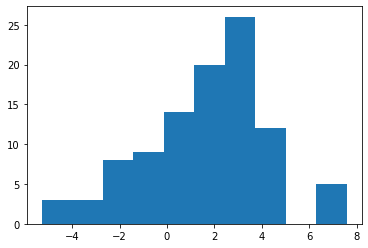

In [3]:
x=1.5+2.5*np.random.randn(100)
#np.random.normal(1.5, 2.5, 100)
plt.hist(x)

(array([ 1.,  1.,  1., 11., 10., 18., 17., 19., 18.,  4.]),
 array([-2.65033322, -2.21709533, -1.78385744, -1.35061955, -0.91738166,
        -0.48414378, -0.05090589,  0.382332  ,  0.81556989,  1.24880778,
         1.68204567]),
 <BarContainer object of 10 artists>)

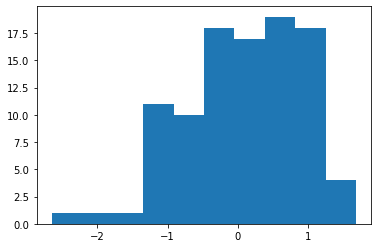

In [4]:
res=0+0.8*np.random.randn(100)
plt.hist(res)

(array([ 3.,  3.,  8.,  9., 14., 20., 26., 12.,  0.,  5.]),
 array([-5.01512307, -2.57357905, -0.13203502,  2.309509  ,  4.75105303,
         7.19259705,  9.63414108, 12.0756851 , 14.51722913, 16.95877316,
        19.40031718]),
 <BarContainer object of 10 artists>)

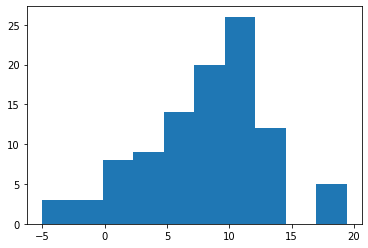

In [5]:
y_prediccion=5+1.9*x
plt.hist(y_prediccion)

(array([ 3.,  6.,  6., 12., 14., 25., 20.,  8.,  2.,  4.]),
 array([-4.16058124, -1.72226113,  0.71605897,  3.15437908,  5.59269919,
         8.03101929, 10.4693394 , 12.90765951, 15.34597961, 17.78429972,
        20.22261983]),
 <BarContainer object of 10 artists>)

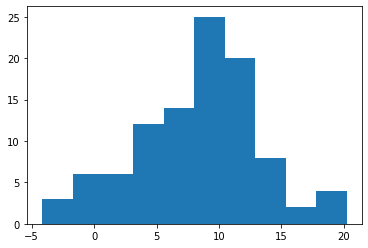

In [6]:
y_act=5+1.9*x+res
plt.hist(y_act)

In [7]:
## convertir a listas los datos
x_list=x.tolist()
y_pred_list=y_prediccion.tolist()
y_act_list=y_act.tolist()

In [8]:
## crear dataframe
dataframe=pd.DataFrame({
    "x": x_list,
    "y_actual": y_act_list,
    "y_predicion": y_pred_list
})
dataframe

,x,y_actual,y_predicion
0,-0.278892,4.187723,4.470105
1,3.461681,12.566614,11.577194
2,3.350744,12.105422,11.366413
3,2.031030,8.920678,8.858956
4,3.361658,11.314794,11.387150
...,...,...,...
95,-2.048441,0.507801,1.107962
96,4.625199,14.174695,13.787877
97,-0.362353,4.549921,4.311529
98,4.924716,13.848985,14.356960


In [9]:
## obtener el promedio de las y
y_mean=y_act.tolist()

In [10]:
#asignar el promedio de y_actual por cada posicion de x
y_mean=y_act.mean()*np.ones(len(x))
y_mean=y_mean.tolist()

Text(0.5, 1.0, 'Valor actual vs predicción')

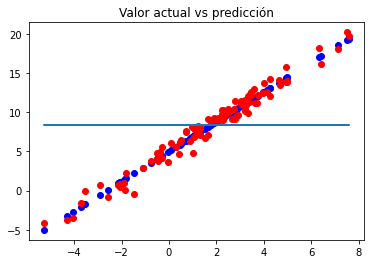

In [11]:
%matplotlib inline
plt.plot(x, y_pred_list, "bo")
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean)
plt.title("Valor actual vs predicción")

El modelo no puede explicar por que un dato se separa mucho o poco de la predición a esa separacion se le llama SSD
* **SSE**: suma de los cuadrados de las diferencias, la diferencia entre el esperado y el dato
* **SST**: la suma de los cuadrados totales, la diferencia entre el dato y el promedio
* **SSR**: suma de los cuadrados de la regresión, la diferencia entre la prediccion(la recta) y el promedio
> ***Nota***: Esto se hace con cada uno de los datos
> 
>**SST**: SSR+SSE es la suma de los otros dos
>
> SSR viene explicada por el modelo por una desviación estandar
>
> SSE no viene explicada por el modelo y se debe distribuir de manera aleatoria

Es necesario que el error SSE, el error no explicado sea minimo para que su valor no afecté demasiado al modelo

R2=SSR/SST, siempre será menor a uno, entre más cerca este de uno mejor será el modelo
> R2(cuadrado), no sicnifica que este bien el modelo, solo es uno de tantos factores para decir que es bueno el modelo

<img src="https://www.researchgate.net/profile/Christian-Gold/publication/322398615/figure/fig17/AS:581620512903169@1515680544091/Visualization-of-SSE-SSR-SST.png">

In [12]:
## agregar los datos datos de las diferencias al dataset
dataframe["SST"]=(dataframe["y_predicion"]-np.mean(y_act))**2
dataframe["SSR"]=(dataframe["y_predicion"]-dataframe["y_actual"])**2
dataframe["SSD"]=(dataframe["y_actual"]-np.mean(y_act))**2

In [13]:
dataframe

,x,y_actual,y_predicion,SST,SSR,SSD
0,-0.278892,4.187723,4.470105,15.025244,0.079740,17.294144
1,3.461681,12.566614,11.577194,10.438376,0.978953,17.810663
2,3.350744,12.105422,11.366413,9.120805,0.546134,14.130650
3,2.031030,8.920678,8.858956,0.262769,0.003810,0.329857
4,3.361658,11.314794,11.387150,9.246490,0.005235,8.811680
...,...,...,...,...,...,...
95,-2.048441,0.507801,1.107962,52.394213,0.360193,61.442793
96,4.625199,14.174695,13.787877,29.610260,0.149628,33.969650
97,-0.362353,4.549921,4.311529,16.279753,0.056831,14.412842
98,4.924716,13.848985,14.356960,36.127481,0.258039,30.279031


In [14]:
SSR=dataframe["SSR"].sum()
SSD=dataframe["SSD"].sum()
SST=dataframe["SST"].sum()
print(SSR,SST,SSD,SSR+SSD)

68.6288242914536 2389.7636004318842 2484.3648583659606 2552.993682657414


In [15]:
## encontramos r2 
R2=SST/SSD
## recordemos entre más se acerqué a 1 es mejor
R2

0.9619213507969605

In [20]:
## obtenemos el promedio de x y de y
x_mean=dataframe["x"].mean()
y_mean=dataframe["y_actual"].mean()

In [56]:
##obtener numerador de la beta
## restar la x menos el promedio de las x por la y actual (datos) menos el promedio
dataframe["beta_n"]=(dataframe["x"]-x_mean)*(dataframe["y_actual"]-y_mean)
## obtenemos la varianza
dataframe["beta_d"]=(dataframe["x"]-x_mean)**2

In [59]:
beta=dataframe["beta_n"].sum()/dataframe["beta_d"].sum()
beta

1.9108125936691738

In [62]:
alpha=y_mean-beta*x_mean

In [64]:
#modelo lineal obtenido por regresion
alpha, beta

(5.059508001899861, 1.9108125936691738)

In [65]:
## crear una variable de prediccion en base al modelo
dataframe["y_modelo"]=alpha+beta*dataframe["x"]

In [66]:
dataframe.head()

,x,y_actual,y_predicion,SST,SSR,SSD,beta_n,beta_d,y_modelo
0,-0.278892,4.187723,4.470105,15.025244,0.079740,17.294144,8.313161,3.996072,4.526598
1,3.461681,12.566614,11.577194,10.438376,0.978953,17.810663,7.349829,3.033014,11.674131
2,3.350744,12.105422,11.366413,9.120805,0.546134,14.130650,6.129616,2.658915,11.462152
3,2.031030,8.920678,8.858956,0.262769,0.003810,0.329857,0.178562,0.096661,8.940425
4,3.361658,11.314794,11.387150,9.246490,0.005235,8.811680,4.872802,2.694628,11.483007


In [68]:
## saber la eficacia del modelo con R2(r cuadrada)
## suma de los cuadrados de la regresión
SSR=sum((dataframe["y_modelo"]-y_mean)**2)
SSD=sum((dataframe["y_modelo"]-dataframe["y_actual"])**2)
##suma de los cuadrados totales
SST=sum((dataframe["y_actual"]-y_mean)**2)

In [70]:
SSR, SSD, SST, SSR+SSD

(2416.4234790756386, 67.94137929032325, 2484.3648583659606, 2484.364858365962)

In [72]:
## saber r cuadrado
R2=SSR/SST
R2

0.9726524149375511

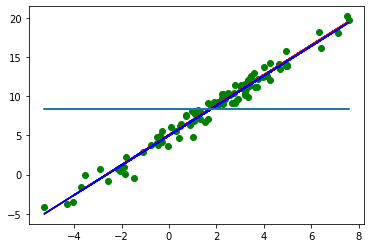

In [89]:
%matplotlib inline
plt.plot(dataframe["x"], dataframe["y_actual"], "go")
plt.plot(dataframe["x"], dataframe["y_modelo"], "r")
plt.plot(dataframe["x"], dataframe["y_predicion"], "b")
plt.plot(dataframe["x"], np.full(dataframe.shape[0], y_mean))


In [81]:
dataframe.columns

Index(['x', 'y_actual', 'y_predicion', 'SST', 'SSR', 'SSD', 'beta_n', 'beta_d',
       'y_modelo'],
      dtype='object')

In [83]:
data

array([8.34634619, 8.34634619, 8.34634619, 8.34634619, 8.34634619,
       8.34634619, 8.34634619, 8.34634619, 8.34634619, 8.34634619,
       8.34634619, 8.34634619, 8.34634619, 8.34634619, 8.34634619,
       8.34634619, 8.34634619, 8.34634619, 8.34634619, 8.34634619,
       8.34634619, 8.34634619, 8.34634619, 8.34634619, 8.34634619,
       8.34634619, 8.34634619, 8.34634619, 8.34634619, 8.34634619,
       8.34634619, 8.34634619, 8.34634619, 8.34634619, 8.34634619,
       8.34634619, 8.34634619, 8.34634619, 8.34634619, 8.34634619,
       8.34634619, 8.34634619, 8.34634619, 8.34634619, 8.34634619,
       8.34634619, 8.34634619, 8.34634619, 8.34634619, 8.34634619,
       8.34634619, 8.34634619, 8.34634619, 8.34634619, 8.34634619,
       8.34634619, 8.34634619, 8.34634619, 8.34634619, 8.34634619,
       8.34634619, 8.34634619, 8.34634619, 8.34634619, 8.34634619,
       8.34634619, 8.34634619, 8.34634619, 8.34634619, 8.34634619,
       8.34634619, 8.34634619, 8.34634619, 8.34634619, 8.34634

In [95]:
## Error estandar de los residuos RSE
RSE=np.sqrt(SSD/(len(dataframe)-2))
RSE

0.8326340015357904

In [91]:
SSD

67.94137929032325

In [99]:
## obtenemos el promedio
promedio=dataframe["y_actual"].mean()
promedio

8.346346189713897

In [104]:
## obtener el porcentaje de error, el modelo tiene ese porcentaje de erro al predecir los datos
porcentaje_error=RSE/promedio
porcentaje_error

0.09976030020920233